In [8]:
import pandas as pd
data = pd.read_csv('/Users/pivit/DSI-NYC-2/projects/projects-weekly/project-02/assets/billboard.csv')

In [49]:
### CLEANING THE DATASET
##Remove "*".
def replace_nulls(value):
    if value == '101':
        return np.nan
    else:
        return value
data = data.applymap(replace_nulls)



In [46]:
# # # ###Change Rock'n'Roll to Rock
def change_rock(value):
    if value == "Rock'n'roll":
        return 'Rock'
    else:
        return value
data = data.applymap(change_rock)


In [205]:
def change_rnb(value):
    if value == "R & B":
        return "R&B"
    else:
        return value
fulldata = fulldata.applymap(change_rnb)

In [14]:
# ## Change the time to total seconds
data['time'] = [int(x[0]) * 60 + int(x[2:4]) for x in data['time']]


In [16]:
# ## Change Column Names
data.rename(columns=lambda x: x.replace('x', ''), inplace=True)
data.rename(columns=lambda x: x.replace('.', ' '), inplace=True)
data.rename(columns={'time':'time in seconds'}, inplace=True)


In [17]:
# ## Fixing the Dates
data['date entered'] = pd.to_datetime(data['date entered'])
data['date peaked'] = pd.to_datetime(data['date peaked'])

In [50]:
weeks = data.iloc[:, 7:83]
def tryInt(value):
        try:
            return int(value)
        except:
            return np.nan
weeks = weeks.applymap(tryInt)

In [51]:
smalldata = data.iloc[:,:7]
fulldata = pd.concat([smalldata, weeks], axis=1)
fulldata.head(10)

,year,artist inverted,track,time in seconds,genre,date entered,date peaked,1st week,2nd week,3rd week,...,67th week,68th week,69th week,70th week,71st week,72nd week,73rd week,74th week,75th week,76th week
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,257,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,271,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,216,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,232,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,265,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [53]:
import numpy as np

In [22]:
t = fulldata.T

In [122]:
fulldata['Week 1 Increase'] = fulldata['1st week'] - fulldata['2nd week']
fulldata['Week 2 Increase'] = fulldata['2nd week'] - fulldata['3rd week']
fulldata['Week 3 Increase'] = fulldata['3rd week'] - fulldata['4th week']
fulldata['Week 4 Increase'] = fulldata['4th week'] - fulldata['3rd week']
fulldata['Week 5 Increase'] = fulldata['5th week'] - fulldata['4th week']
fulldata['Week 6 Increase'] = fulldata['6th week'] - fulldata['5th week']

In [55]:
###CREATING A NEW COLUMN PUTTING SONG LENGTH IN BUCKETS
justtime = fulldata['time in seconds']
jt = pd.DataFrame(justtime)
def time_grouper(row):
    if row < 120:
        return 'Less than 2 Minutes'
    elif row < 150:
        return '2-2:30 Minutes'
    elif row < 180:
        return '2:30-3 Minutes'
    elif row < 210:
        return '3-3:30 Minutes'
    elif row < 240:
        return '3:30-4 Minutes'
    elif row < 270:
        return '4-4:30 Minutes'
    elif row < 300:
        return '4:30-5 Minutes'
    else:
        return 'Over 5 Minutes'

justtime.apply (lambda row: time_grouper (row))

fulldata['Time Group'] = justtime.apply (lambda row: time_grouper (row))



In [63]:
by_time = fulldata.groupby(['Time Group'])[['1st week', '2nd week', '3rd week', '4th week', '5th week', '6th week']].agg([np.mean])


In [225]:
###CREATING A NEW COLUMN PUTTING 1st week in buckets
timebuckets = fulldata['1st week']
weekbucket = pd.DataFrame(timebuckets)
def week_grouper(row):
    if row < 10:
        return '0-10'
    elif row < 20:
        return '10-20'
    elif row < 30:
        return '20-30'
    elif row < 40:
        return '30-40'
    elif row < 50:
        return '40-50'
    elif row < 60:
        return '50-60'
    elif row < 70:
        return '60-70'
    elif row < 80:
        return '70-80'
    elif row < 90:
        return '80-90'
    else:
        return '90-100'

#timebuckets.apply (lambda row: week_grouper (row))

#fulldata['week bucket'] = timebuckets.apply (lambda row: week_grouper (row))



In [226]:
###CREATING A SEPARATE SAMPLE FOR OUR T-TEST!
increasebucket = fulldata['Week 1 Increase']
theincreasebucket = pd.DataFrame(increasebucket)
def increase_grouper(row):
    if row < 10:
        return 'Less Than 10 Spot Increase'
    else:
        return 'More Than 10 Spot Increase'

increasebucket.apply (lambda row: increase_grouper (row))

fulldata['increase bucket'] = increasebucket.apply (lambda row: increase_grouper (row))

fulldata.head(3)

,year,artist inverted,track,time in seconds,genre,date entered,date peaked,1st week,2nd week,3rd week,...,Week 3 Increase,Time Group,Days to Peak,Week 4 Increase,Week 5 Increase,Week 6 Increase,micro,Peak,week bucket,increase bucket
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,16.0,3:30-4 Minutes,56 days,-16.0,-10.0,-8.0,4838400000000000,56.0,70-80,More Than 10 Spot Increase
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,1.0,4-4:30 Minutes,56 days,-1.0,-3.0,1.0,4838400000000000,56.0,10-20,Less Than 10 Spot Increase
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,12.0,4-4:30 Minutes,98 days,-12.0,-11.0,-7.0,8467200000000000,98.0,70-80,More Than 10 Spot Increase


In [72]:
# ###CREATING A NEW COLUMN PUTTING MONTH OF ENTERED IN BUCKETS
# justentered = fulldata['date entered']
# entered = pd.DataFrame(justentered)
# def month_grouper(row):
#     if row < '2000-01-01':
#         return '1999'
#     elif row < '2000-02-01':
#         return 'Jan-2000'
#     elif row < '2000-03-01':
#         return 'Feb-2000'
#     elif row < '2000-02-01':
#         return 'Mar-2000'
#     elif row < '2000-02-01':
#         return 'Apr-2000'
#     elif row < '2000-02-01':
#         return 'May-2000'
#     elif row < '2000-02-01':
#         return 'Jun-2000'
#     elif row < '2000-02-01':
#         return 'Jul-2000'
#     elif row < '2000-02-01':
#         return 'Aug-2000'
#     elif row < '2000-02-01':
#         return 'Sep-2000'
#     elif row < '2000-02-01':
#         return 'Oct-2000'
#     elif row < '2000-02-01':
#         return 'Nov-2000'
#     else:
#         return 'Dec-2000'

# justentered.apply (lambda row: month_grouper (row))

# # fulldata['Time Group'] = justtime.apply (lambda row: time_grouper (row))
# # fulldata['date entered'].head()
# # def testfunc():
# #     if '2000-09-23' > '2000-09-22':
# #         print "Success"
# #     else:
# #         print "Failure"
# # testfunc()


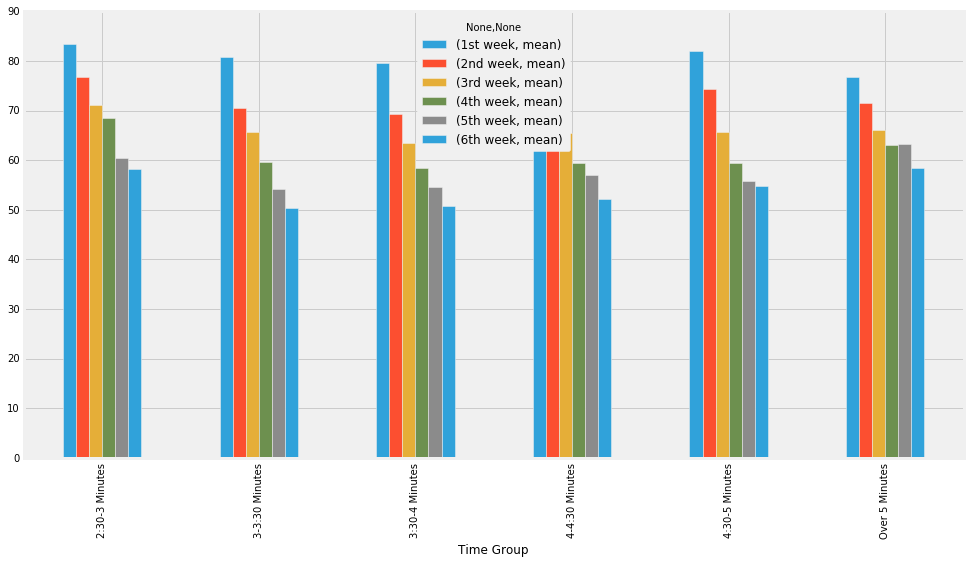

In [60]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
by_time.plot(kind='bar',figsize=(15,8))

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [53]:
tpd = pd.DataFrame(t)

In [65]:
###NEED TO BREAK THIS DOWN BY GENRE AVERAGES

In [24]:
by_genre = fulldata.groupby(['genre'])[['1st week', '2nd week', '3rd week']].agg([np.mean])

In [25]:
by_genre

,1st week,2nd week,3rd week
,mean,mean,mean
genre,,,
Country,82.405405,75.256757,72.202703
Electronica,84.500000,71.000000,64.000000
Gospel,76.000000,76.000000,74.000000
Jazz,89.000000,89.000000,7.000000
Latin,73.222222,64.333333,58.777778
Pop,79.222222,71.666667,69.444444
R & B,92.500000,87.400000,86.700000
R&B,77.615385,68.000000,57.384615


In [238]:
fulldata['genre'].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

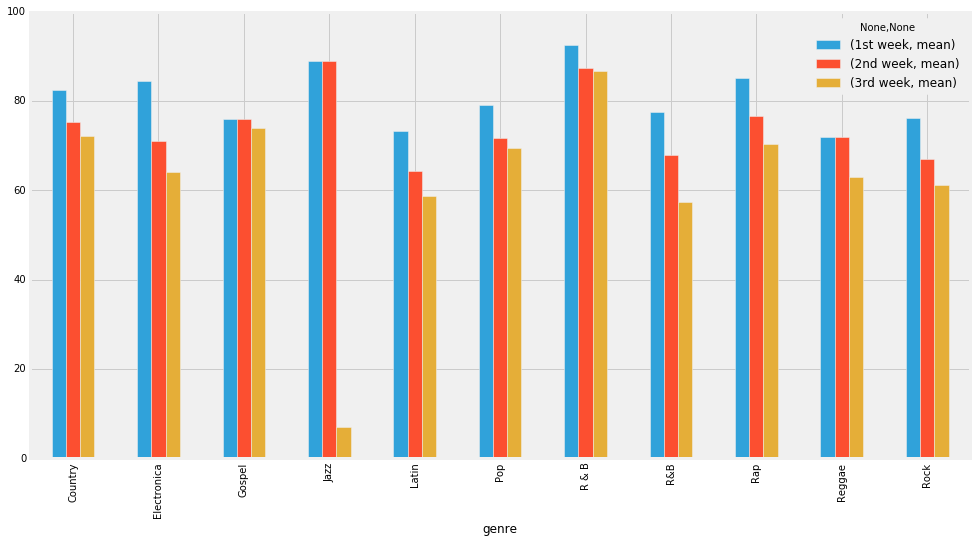

In [62]:
by_genre.plot(kind='bar',figsize=(15,8),\
                                     style={'1st week':'oy', '2nd week': 'ob', '3rd week': 'og'})

In [82]:
fulldata['Days to Peak'] = fulldata['date peaked'] - fulldata['date entered']

In [ ]:
by_genre = fulldata.groupby(['genre'])[['1st week', '2nd week', '3rd week']].agg([np.mean])

In [104]:
fulldata['test5'] = fulldata['Days to Peak'].astype(int)


In [121]:
by_peak = fulldata.groupby(['genre'])['test5'].agg([np.mean])

In [126]:
genre_time = fulldata.groupby(['genre', 'Time Group'])[['1st week', '2nd week', '3rd week', '4th week', '5th week', '6th week']].agg([np.mean])
genre_time

1st week   2nd week   3rd week   4th week  \
                                 mean       mean       mean       mean   
genre       Time Group                                                   
Country     2:30-3 Minutes  81.750000  76.000000  69.875000  67.625000   
            3-3:30 Minutes  84.444444  78.388889  75.166667  71.944444   
            3:30-4 Minutes  84.000000  76.200000  74.208333  70.173913   
            4-4:30 Minutes  77.357143  68.857143  64.928571  64.071429   
            4:30-5 Minutes  86.250000  81.000000  79.000000  67.000000   
            Over 5 Minutes  79.200000  71.400000  64.800000  60.400000   
Electronica 3-3:30 Minutes  67.000000  29.000000  16.000000  16.000000   
            3:30-4 Minutes  98.000000  96.000000  93.000000  93.000000   
            4-4:30 Minutes  94.000000  94.000000  94.000000  87.000000   
            Over 5 Minutes  79.000000  65.000000  53.000000  48.000000   
Gospel      Over 5 Minutes  76.000000  76.000000  74.000000  69.000000   
Jazz        Over 5 Minutes  89.000000  89.000000   7.000000   8.000000   
Latin       3-3:30 Minutes  74.000000  66.000000  52.000000  39.000000   
            3:30-4 Minutes  75.500000  63.750000  60.000000  53.750000   
            4-4:30 Minutes  64.333333  58.000000  52.666667  51.000000   
            Over 5 Minutes  90.000000  84.000000  79.000000  67.000000   
Pop         3-3:30 Minutes  87.000000  87.000000  94.000000  91.000000   
            3:30-4 Minutes  77.500000  65.666667  62.666667  51.166667   
            4-4:30 Minutes  80.500000  63.000000  54.000000  72.500000   
R & B       3-3:30 Minutes  96.000000  87.000000  92.000000        NaN   
            3:30-4 Minutes  88.000000  79.666667  75.333333  76.000000   
            4-4:30 Minutes  93.333333  89.666667  90.666667  86.000000   
            4:30-5 Minutes  93.000000  77.000000  75.000000  70.000000   
R&B         3-3:30 Minutes  99.000000  83.500000  71.000000  55.500000   
            3:30-4 Minutes  70.400000  64.000000  57.000000  54.000000   
            4-4:30 Minutes  66.666667  53.000000  47.000000  46.666667   
            4:30-5 Minutes  91.000000  91.000000  71.500000  70.000000   
            Over 5 Minutes  77.000000  56.000000  35.000000  26.000000   
Rap         2:30-3 Minutes  87.500000  80.000000  77.000000  76.500000   
            3-3:30 Minutes  72.000000  61.000000  49.500000  51.500000   
            3:30-4 Minutes  82.541667  70.956522  62.136364  58.636364   
            4-4:30 Minutes  89.136364  83.590909  77.714286  70.857143   
            4:30-5 Minutes  88.000000  74.000000  62.400000  56.400000   
            Over 5 Minutes  79.666667  74.000000  73.000000  68.000000   
Reggae      4-4:30 Minutes  72.000000  72.000000  63.000000  56.000000   
Rock        2:30-3 Minutes  89.000000  76.000000  69.000000  59.000000   
            3-3:30 Minutes  73.882353  62.312500  57.125000  48.733333   
            3:30-4 Minutes  76.170732  64.731707  57.175000  51.275000   
            4-4:30 Minutes  77.274510  68.078431  60.460000  52.437500   
            4:30-5 Minutes  76.230769  69.846154  61.153846  56.538462   
            Over 5 Minutes  73.428571  70.357143  70.857143  70.214286   

                             5th week   6th week  
                                 mean       mean  
genre       Time Group                            
Country     2:30-3 Minutes  62.375000  61.250000  
            3-3:30 Minutes  69.117647  65.352941  
            3:30-4 Minutes  65.478261  61.608696  
            4-4:30 Minutes  65.142857  59.923077  
            4:30-5 Minutes  64.000000  73.000000  
            Over 5 Minutes  57.000000  55.200000  
Electronica 3-3:30 Minutes  13.000000  11.000000  
            3:30-4 Minutes  93.000000  92.000000  
            4-4:30 Minutes  77.000000  77.000000  
            Over 5 Minutes  45.000000  36.000000  
Gospel      Over 5 Minutes  68.000000  67.000000  
Jazz        Over 5 Minutes  66.000000        NaN  
Latin  

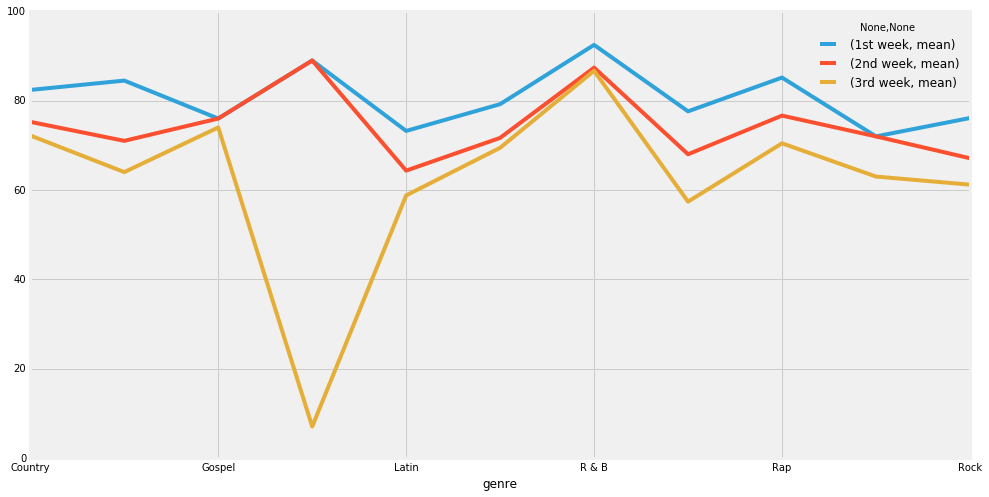

In [130]:
by_genre.plot(kind='line',figsize=(15,8))


In [154]:
fulldata['micro'] = fulldata['Days to Peak'].astype(int)
fulldata['Peak'] = fulldata['micro'] / 86400000000000

In [209]:
by_peak = fulldata.groupby(['Time Group'])[['Peak']].agg([np.mean])
by_peak
by_peakgenre = fulldata.groupby(['genre','Time Group'])[['Peak']].agg([np.mean])
initialvspeak = fulldata.groupby(['week bucket'])[['Peak']].agg([np.mean])
initialvspeak
by_genre2 = fulldata.groupby(['genre'])[['Peak']].agg([np.mean])


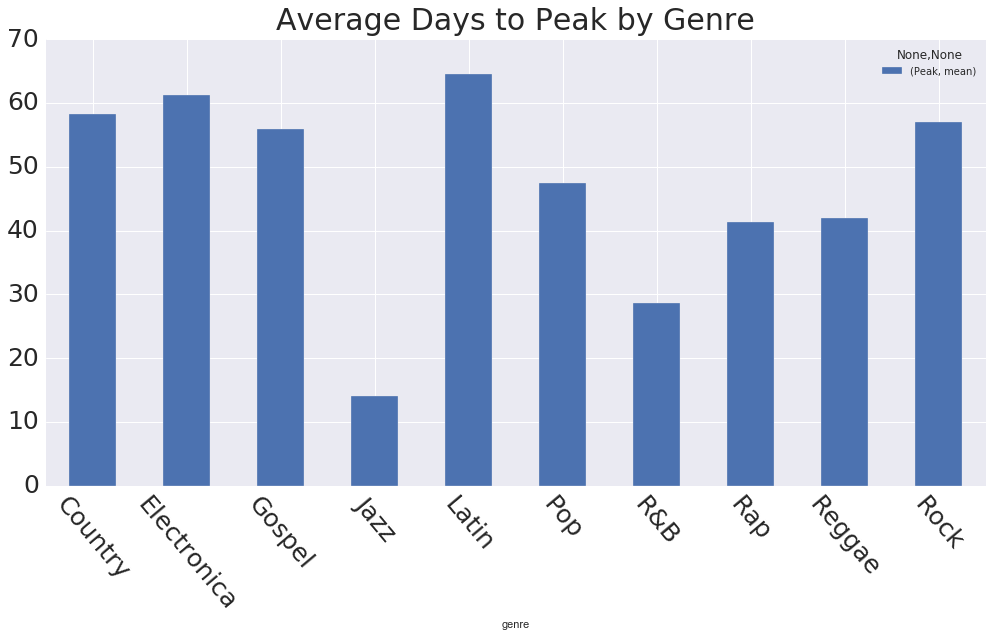

In [210]:

by_genre2.plot(kind='bar',figsize=(15,8), fontsize = 25, rot = -50)\
.set_title('Average Days to Peak by Genre', fontsize = 30, y = 1.01)


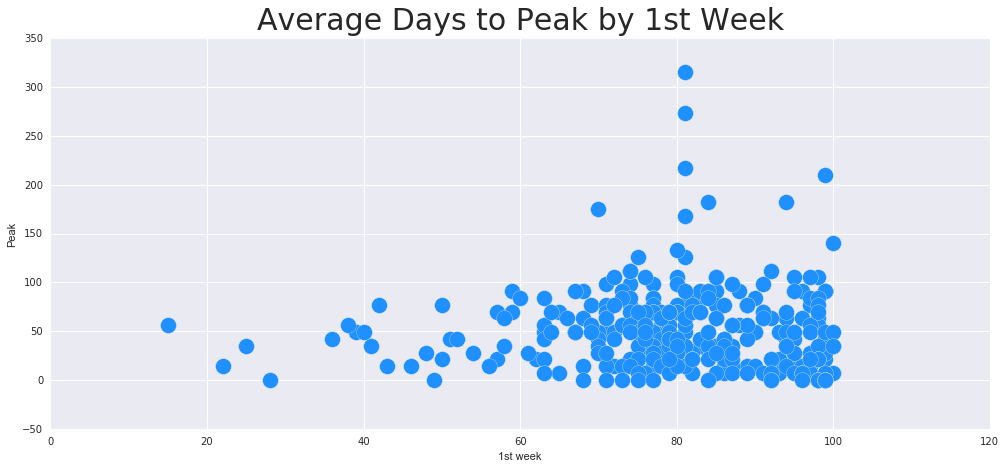

In [240]:

fulldata.plot(x='1st week', y='Peak', kind='scatter', color='dodgerblue',\
        figsize=(15,7), s=250).set_title('Average Days to Peak by 1st Week', fontsize = 30, y = 1.01)

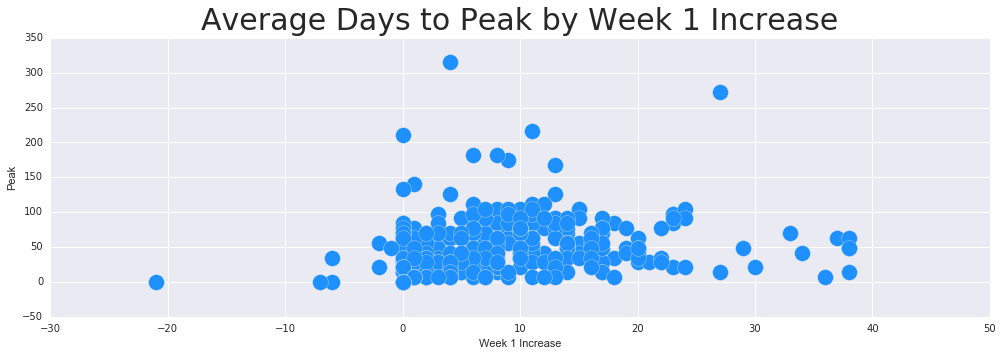

In [242]:
fulldata.plot(x='Week 1 Increase', y='Peak', kind='scatter', color='dodgerblue',\
        figsize=(15,5), s=250).set_title('Average Days to Peak by Week 1 Increase', fontsize = 30, y = 1.01)

In [223]:
# from scipy import stats
# import numpy as np
# average_peak = np.mean(fulldata['Peak'])
# std_peak = np.std(fulldata['Peak'])
weektest = fulldata.groupby(['week bucket'])[['Peak']].agg([np.mean])
weektest

,Peak
,mean
week bucket,
10-20,56.000000
20-30,16.333333
30-40,49.000000
40-50,31.000000
50-60,47.833333
60-70,49.560000
70-80,53.336957
80-90,62.522727


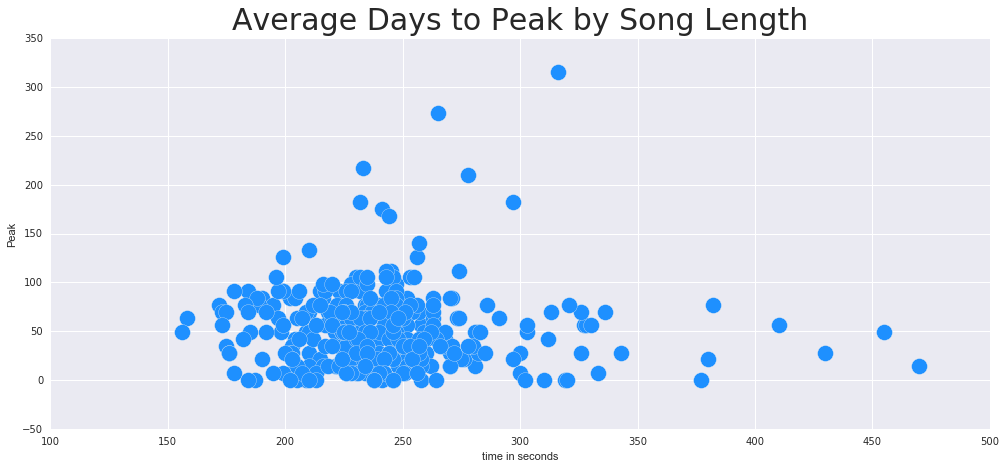

In [243]:
fulldata.plot(x='time in seconds', y='Peak', kind='scatter', color='dodgerblue',\
        figsize=(15,7), s=250).set_title('Average Days to Peak by Song Length', fontsize = 30, y = 1.01)

In [155]:
fulldata.head(5)

,year,artist inverted,track,time in seconds,genre,date entered,date peaked,1st week,2nd week,3rd week,...,Week 1 Increase,Week 2 Increase,Week 3 Increase,Time Group,Days to Peak,Week 4 Increase,Week 5 Increase,Week 6 Increase,micro,Peak
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,15.0,14.0,16.0,3:30-4 Minutes,56 days,-16.0,-10.0,-8.0,4838400000000000,56.0
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,7.0,2.0,1.0,4-4:30 Minutes,56 days,-1.0,-3.0,1.0,4838400000000000,56.0
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,23.0,5.0,12.0,4-4:30 Minutes,98 days,-12.0,-11.0,-7.0,8467200000000000,98.0
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,18.0,5.0,4.0,3:30-4 Minutes,35 days,-4.0,-12.0,-1.0,3024000000000000,35.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,10.0,2.0,16.0,3:30-4 Minutes,70 days,-16.0,-6.0,-5.0,6048000000000000,70.0


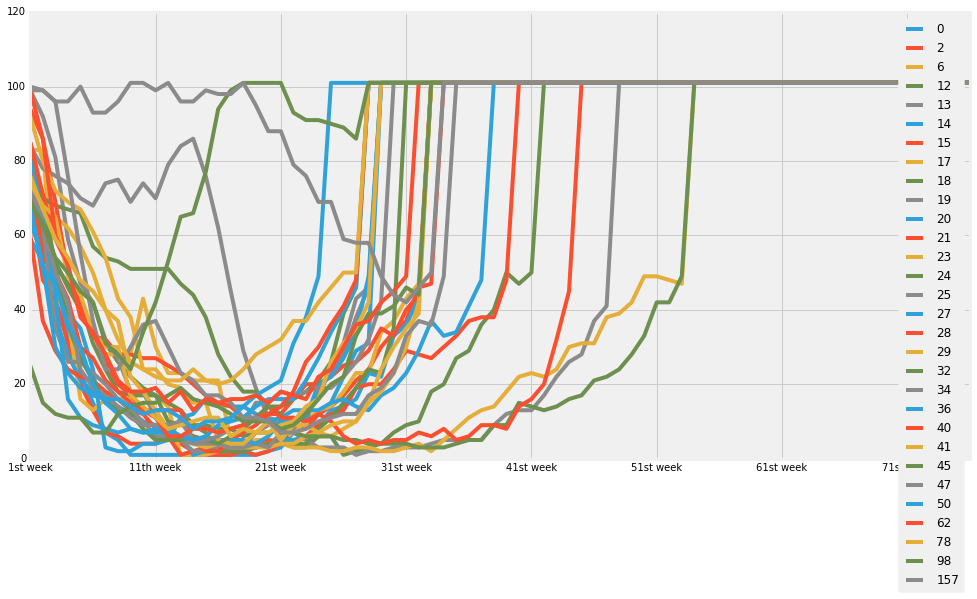

In [138]:
tweeks.plot(kind='line',figsize=(15,8))


In [147]:
weeks['best'] = min

In [231]:
from scipy import stats
import numpy as np
average_peak = np.mean(fulldata['Peak'])
std_peak = np.std(fulldata['Peak'])
grouped = fulldata.groupby(['increase bucket'])[['Peak']].agg([np.mean])
grouped_std = fulldata.groupby(['increase bucket'])[['Peak']].agg([np.std])
print grouped
print average_peak
print std_peak
print grouped_std

                                 Peak
                                 mean
increase bucket                      
Less Than 10 Spot Increase  47.740741
More Than 10 Spot Increase  58.898438
52.2460567823
40.8030898027
                                 Peak
                                  std
increase bucket                      
Less Than 10 Spot Increase  41.575508
More Than 10 Spot Increase  39.014199


In [232]:
average_peak_less_than_10 = 47.74
std_peak_less_than_10 = 41.57

In [233]:
fulldata['increase bucket'].value_counts()

Less Than 10 Spot Increase    189
More Than 10 Spot Increase    128
Name: increase bucket, dtype: int64

In [235]:
n_less_than_10 = 189
n_more_than_10 = 128
total_n = n_less_than_10 + n_more_than_10
squareroot_less_than_10 = n_less_than_10 ** 0.5
standard_error = std_peak_less_than_10 / squareroot_less_than_10
print standard_error

3.0237725657


In [236]:
t_stat = (average_peak_less_than_10 - average_peak) / standard_error
print t_stat

-1.49021022065


In [237]:
#p_value calculated from https://graphpad.com/quickcalcs/PValue1.cfm
p_value = 0.1379